# Árvore de decisão - eReader

### Base de dados: XLS Atividade 3 bases 

Funcionamento do algoritmo de árvore de decisão com dados nominais.

Professor: Hugo de Paula

Alunos: Tiago Henrique Pereira Fonseca

---

DESCRIÇÃO DOS ATRIBUTOS:

1. ID_usuário: um identificador numérico associado a cada pessoa que possui uma conte no site.
2. Gênero: M (masculino) ou F (feminino).
3. Idade: numérico.
4. Estado_civil: C – casado, S – não casados (solteiros, viúvos, divorciados, etc.).
5. Atividade_no_site: Esporádico, Intermitente, Frequente.
6. Pesquisou_eletronicos_12m: Sim/Não indicando se é o usuário andou pesquisando eletrônicos no site nos últimos 12 meses.
7. Comprou_eletronicos_12m: Sim/Não indicando se é o usuário comprou eletrônicos no site nos últimos 12 meses.
8. Pesquisou_mídia_digital_18m: Sim/Não indicando se é o usuário andou pesquisando mídia digital (como mp3) no site nos últimos 18 meses.
9. Comprou_mídia_digital_18m: Sim/Não indicando se é o usuário comprou mídia digital (como mp3) no site nos últimos 18 meses.
10. Forma_pagamento: Transferência; Website; Cartão e Boleto bancário.
11. Adoção_eReader: Esse atributo será o rótulo classificador - **label**
12. Inovator: quem comprou eReaders de geração anteriores até 1 semana após o lançamento.
13. Early Adopter: quem comprou eReaders de geração anteriores entre 1 e 3 semanas após o lançamento.
14. Early Majority: quem comprou eReaders de geração anteriores entre 3 semanas e 2 meses após o lançamento.
15. Late Majority: quem comprou eReaders de geração anteriores após 2 meses do lançamento.

---


### Inicialização da plataforma do Colab.

Essa seção instala e carrega os pacotes necessários para a execução do código.

In [111]:
!pip install pydotplus
!pip install dtreeviz

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [113]:
# Importa Planilha para o Colab
# from google.colab import files
# uploaded = files.upload()

In [114]:
# from google.colab import drive
# drive.mount('/content/drive')

### Transformação de dados

Inicialmente os atributos são convertidos para o formato de dicionário.
Em seguida os atributos são transformados em binário, para cada par (key, value) do dicionário.

<code>DictVectorizer(dtype=class ‘numpy.float64’, separator=’=’, sparse=True, sort=True)</code>

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>


In [115]:
# Leitura de Excel e Descrição dos dados em nosso DataFrame

#
# 1. ID_usuário: um identificador numérico associado a cada pessoa que possui uma conte no site.
# 2. Gênero: M (masculino) ou F (feminino).
# 3. Idade: numérico.
# 4. Estado_civil: C – casado, S – não casados (solteiros, viúvos, divorciados, etc.).
# 5. Atividade_no_site: Esporádico, Intermitente, Frequente.
# 6. Pesquisou_eletronicos_12m: Sim/Não indicando se é o usuário andou pesquisando eletrônicos no site nos últimos 12 meses.
# 7. Comprou_eletronicos_12m: Sim/Não indicando se é o usuário comprou eletrônicos no site nos últimos 12 meses.
# 8. Pesquisou_mídia_digital_18m: Sim/Não indicando se é o usuário andou pesquisando mídia digital (como mp3) no site nos últimos 18 meses.
# 9. Comprou_mídia_digital_18m: Sim/Não indicando se é o usuário comprou mídia digital (como mp3) no site nos últimos 18 meses.
# 10. Forma_pagamento: Transferência; Website; Cartão e Boleto bancário.
# 11. Adoção_eReader: Esse atributo será o rótulo classificador - **label**
# 12. Inovator: quem comprou eReaders de geração anteriores até 1 semana após o lançamento.
# 13. Early Adopter: quem comprou eReaders de geração anteriores entre 1 e 3 semanas após o lançamento.
# 14. Early Majority: quem comprou eReaders de geração anteriores entre 3 semanas e 2 meses após o lançamento.
# 15. Late Majority: quem comprou eReaders de geração anteriores após 2 meses do lançamento.
#

ereader_train_df = pd.read_excel('https://github.com/titilomt/data_science_puc_projects/blob/master/csv/Atividade%203%20-%20Bases.xlsx?raw=true', sheet_name=0)
ereader_validate_df = pd.read_excel('https://github.com/titilomt/data_science_puc_projects/blob/master/csv/Atividade%203%20-%20Bases.xlsx?raw=true', sheet_name=1)

print("\nDimensões: {0}".format(ereader_train_df.shape))
print("\nCampos: {0}".format(ereader_train_df.keys()))


Dimensões: (661, 11)

Campos: Index(['ID_usuário', 'Gênero', 'Idade', 'Estado_civil', 'Atividade_no_site',
       'Pesquisou_eletronicos_12m', 'Comprou_eletronicos_12m',
       'Pesquisou_mídia_digital_18m', 'Comprou_mídia_digital_18m',
       'Forma_pagamento', 'Adoção_eReader'],
      dtype='object')


# Pré processamento de dados

Primeiramente devemos descrever nossos dados visualmente

In [116]:
# Removemos o campo ID pois ele não nos servirá como medida de nosso modelo

ereader_train_df.drop(columns=['ID_usuário'], inplace=True)
ereader_validate_df.drop(columns=['ID_usuário'], inplace=True)

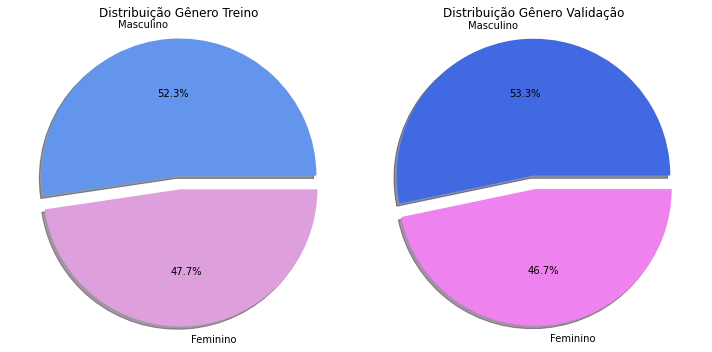

In [117]:
# vamos verificar o a coluna genero para entender a distribuicao dos elementos=
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

ax1.set_title('Distribuição Gênero Treino')
ax1.pie(ereader_train_df['Gênero'].value_counts(), explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['cornflowerblue', 'plum'], labels=['Masculino', 'Feminino'])
ax1.axis('equal')
ax2.pie(ereader_validate_df['Gênero'].value_counts(), explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['royalblue', 'violet'], labels=['Masculino', 'Feminino'])
ax2.set_title('Distribuição Gênero Validação')
ax2.axis('equal')

plt.tight_layout()
plt.show()



A distribuição deste campo parece estar homogenea, portanto não precisamos de executar qualquer tipo de processamento.

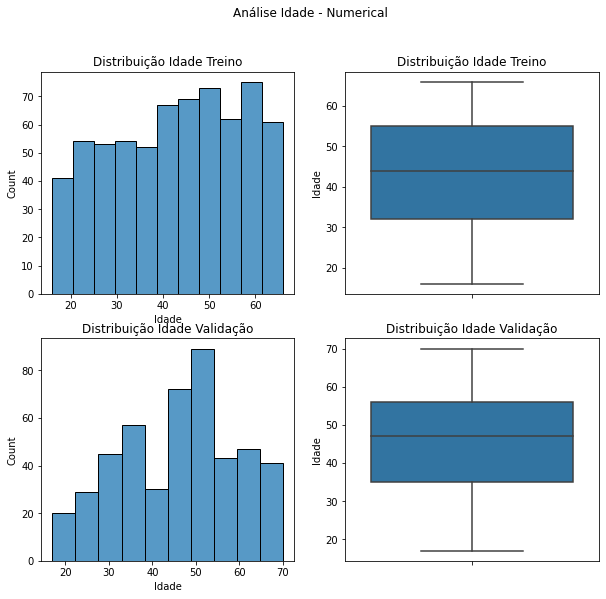

In [118]:
# vamos verificar a idade de nossa base com dados de histograma
fig, axs = plt.subplots(2, 2, figsize=(10, 9))
fig.suptitle('Análise Idade - Numerical')

# analise de intervalo interquartil
sns.histplot(ax=axs[0, 0], data=ereader_train_df['Idade'])
sns.boxplot(ax=axs[0, 1], y=ereader_train_df['Idade'])
axs[0,0].set_title('Distribuição Idade Treino')
axs[0,1].set_title('Distribuição Idade Treino')


sns.histplot(ax=axs[1, 0], data=ereader_validate_df['Idade'])
sns.boxplot(ax=axs[1, 1], y=ereader_validate_df['Idade'])
axs[1,0].set_title('Distribuição Idade Validação')
axs[1,1].set_title('Distribuição Idade Validação')
plt.show()

Podemos ver que nosso campo de Idade também possui uma estrutura homogenea, com sua carga mais pesada de valores entre 30 - 55 anos (Consideramos como idade adulta)

In [119]:
ereader_train_df['Estado_civil'].describe()

count     661
unique      2
top         C
freq      381
Name: Estado_civil, dtype: object

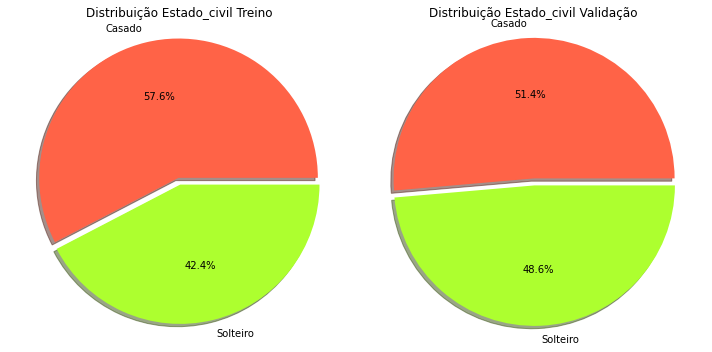

In [120]:
# vamos verificar o a coluna Estado Civil para entender a distribuicao dos elementos em nossos dataframe
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

ax1.set_title('Distribuição Estado_civil Treino')
ax1.pie(ereader_train_df['Estado_civil'].value_counts(), explode=[0, 0.05], autopct='%1.1f%%', shadow=True, colors=['tomato', 'greenyellow'], 
        labels=['Casado', 'Solteiro'])
ax1.axis('equal')
ax2.pie(ereader_validate_df['Estado_civil'].value_counts(), explode=[0, 0.05], autopct='%1.1f%%', shadow=True, colors=['tomato', 'greenyellow'], 
        labels=['Casado', 'Solteiro'])
ax2.set_title('Distribuição Estado_civil Validação')
ax2.axis('equal')

plt.tight_layout()
plt.show()


Podemos ver que, temos uma proporção maior de casados em nossa base de treino, o que pode ser um indicador a ser considerado importante em nossa validação.

In [132]:
ereader_train_df['Adoção_eReader'] = ereader_train_df['Adoção_eReader'].astype('category')
ereader_train_df['Adoção_eReader'].value_counts()

Early Adopter     205
Early Majority    186
Late Majority     172
Innovator          98
Name: Adoção_eReader, dtype: int64

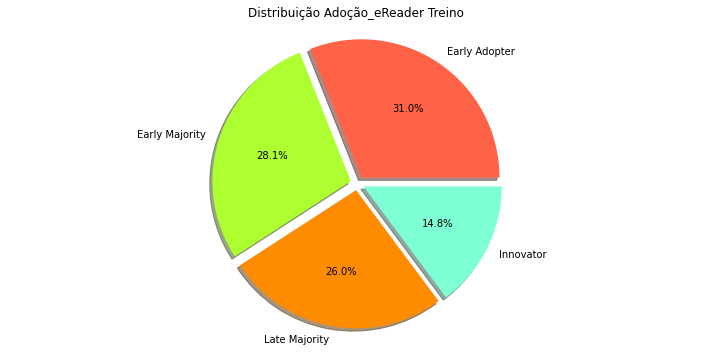

In [135]:
# Adoção_eReader propriedade Label de nosso treinamento de MACHINE LEARN
labels = ['Early Adopter', 'Early Majority', 'Late Majority', 'Innovator']
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 5)

ax.set_title('Distribuição Adoção_eReader Treino')
ax.pie(ereader_train_df['Adoção_eReader'].value_counts(), explode=[0.05, 0.05, 0.05, 0.05], autopct='%1.1f%%', shadow=True, colors=['tomato', 'greenyellow', 'darkorange', 'aquamarine'], 
        labels=labels)
ax.axis('equal')

plt.tight_layout()
plt.show()

Aqui em nossa base, nos temos este campo fragmentado em 4 partes, podemos aplicar uma regra que limita em 2 opções de escolha: 
- Sim (Considerando Inovator e Early Adopter como positivos)
- Não (Considerando Late Majority e Early Majority como negativos)

Ao fazermos está escolha, podemos estar ganhando em nivel de treinamento porem perdendo em nivel de teste/validação

In [136]:
# vamos criar a funcao que transforma o campo de Adoção_eReader em binario

def adocao_eReader_buckets(eReader):
  print("aqui", eReader)
  if eReader in ['Innovator', 'Early Adopter']:
    return 'Sim'
  else: return 'Não'

In [139]:
# Criaremos tambem uma função que retorna as idades em intervalos que fazem sentido
# segundo nossas analises

def age_buckets(age):
  if age < 11:
    return 'criança'
  elif age >= 11 and age < 21:
    return 'jovem'
  elif age >= 21 and age < 60:
    return 'adulto'
  else: return 'idoso'



Aplicamos as transformações para saber como foi, vamos criar uma copia de nosso data frame para comparar com e sem as transformações.

Lembrando que a transformacao do campo de AdocaoEreader so poderá ser executada em treino, pois a base de validação não possui esta coluna!

In [140]:
ereader_train_copy = ereader_train_df.copy()
ereader_validate_copy = ereader_validate_df.copy()

ereader_train_copy['Idade'] = ereader_train_copy['Idade'].apply(age_buckets)
ereader_train_copy['Adoção_eReader'] = ereader_train_copy['Adoção_eReader'].apply(adocao_eReader_buckets)

ereader_validate_copy['Idade'] = ereader_validate_copy['Idade'].apply(age_buckets)

print(ereader_train_df.describe(), sep='\n')
print(ereader_train_df.info())
print("---")
print(ereader_train_copy.describe(), sep='\n')
print(ereader_train_copy.info())

aqui Early Adopter
aqui Early Majority
aqui Innovator
aqui Late Majority
            Idade
count  661.000000
mean    42.794251
std     13.861983
min     16.000000
25%     32.000000
50%     44.000000
75%     55.000000
max     66.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Gênero                       661 non-null    object  
 1   Idade                        661 non-null    int64   
 2   Estado_civil                 661 non-null    object  
 3   Atividade_no_site            661 non-null    object  
 4   Pesquisou_eletronicos_12m    661 non-null    object  
 5   Comprou_eletronicos_12m      661 non-null    object  
 6   Pesquisou_mídia_digital_18m  661 non-null    object  
 7   Comprou_mídia_digital_18m    661 non-null    object  
 8   Forma_pagamento              661 non-null    object  
 9   Adoção

In [141]:
# criando dataframes para treino 

train_df = ereader_train_copy.copy()
validator_df = ereader_validate_copy.copy()

In [143]:
# Preparação de modelo split fit e transform

X_dict = train_df.iloc[:,0: (train_df.shape[1] - 1)].T.to_dict().values()
vect = DictVectorizer(sparse=False)
X_train = vect.fit_transform(X_dict)

le = LabelEncoder()
y_train = le.fit_transform(train_df.iloc[:,(train_df.shape[1] - 1)])

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=20, test_size=0.25)

# Exibe o dado convertido em dicionario.
print("Atributos:", X_dict)

# Exibe a estrutura do dado convertido em binário.
print("Shape do dado de treinamento: {0}".format(X_train.shape))

print("Labels:", y_train)

Atributos: dict_values([{'Gênero': 'M', 'Idade': 'idoso', 'Estado_civil': 'C', 'Atividade_no_site': 'Esporádico', 'Pesquisou_eletronicos_12m': 'Sim', 'Comprou_eletronicos_12m': 'Sim', 'Pesquisou_mídia_digital_18m': 'Sim', 'Comprou_mídia_digital_18m': 'Não', 'Forma_pagamento': 'Transferência'}, {'Gênero': 'M', 'Idade': 'adulto', 'Estado_civil': 'C', 'Atividade_no_site': 'Intermitente', 'Pesquisou_eletronicos_12m': 'Sim', 'Comprou_eletronicos_12m': 'Não', 'Pesquisou_mídia_digital_18m': 'Sim', 'Comprou_mídia_digital_18m': 'Não', 'Forma_pagamento': 'Transferência'}, {'Gênero': 'F', 'Idade': 'adulto', 'Estado_civil': 'C', 'Atividade_no_site': 'Esporádico', 'Pesquisou_eletronicos_12m': 'Sim', 'Comprou_eletronicos_12m': 'Sim', 'Pesquisou_mídia_digital_18m': 'Sim', 'Comprou_mídia_digital_18m': 'Sim', 'Forma_pagamento': 'Transferência'}, {'Gênero': 'M', 'Idade': 'adulto', 'Estado_civil': 'C', 'Atividade_no_site': 'Esporádico', 'Pesquisou_eletronicos_12m': 'Sim', 'Comprou_eletronicos_12m': 'Sim'

### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [145]:
tree_ereader = DecisionTreeClassifier(random_state=20, criterion='entropy')
tree_ereader = tree_ereader.fit(X_train, y_train)
print("Acurácia:", tree_ereader.score(X_train, y_train))

y_pred = tree_ereader.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, 
                         index=["Adota=Sim", "Adota=Não"], 
                         columns=["Adota(prev)=Sim", "Adota(prev)=Não"])


Acurácia: 0.8626262626262626
Acurácia de previsão: 0.6987951807228916
              precision    recall  f1-score   support

         Não       0.67      0.83      0.74        87
         Sim       0.75      0.56      0.64        79

    accuracy                           0.70       166
   macro avg       0.71      0.69      0.69       166
weighted avg       0.71      0.70      0.69       166



In [146]:
cnf_table

,Adota(prev)=Sim,Adota(prev)=Não
Adota=Sim,72,15
Adota=Não,35,44


Como podemos observar em nossos reports, parece que temos um overfitting em nosso modelo, a discrepancia entre o teste e o treino está muito nitida, vamos tentar concertar este problema, logo mais...

Exibição da árvore de decisão



In [147]:
from dtreeviz.trees import *

viz = dtreeviz(tree_ereader,
              X_train,
              y_train,
              target_name='Adoção_eReader',
               feature_names=vect.feature_names_,
              class_names=["Innovator", "Early Adopter", "Early Majority", "Late Majority"],
              fancy=True)  

viz.view()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


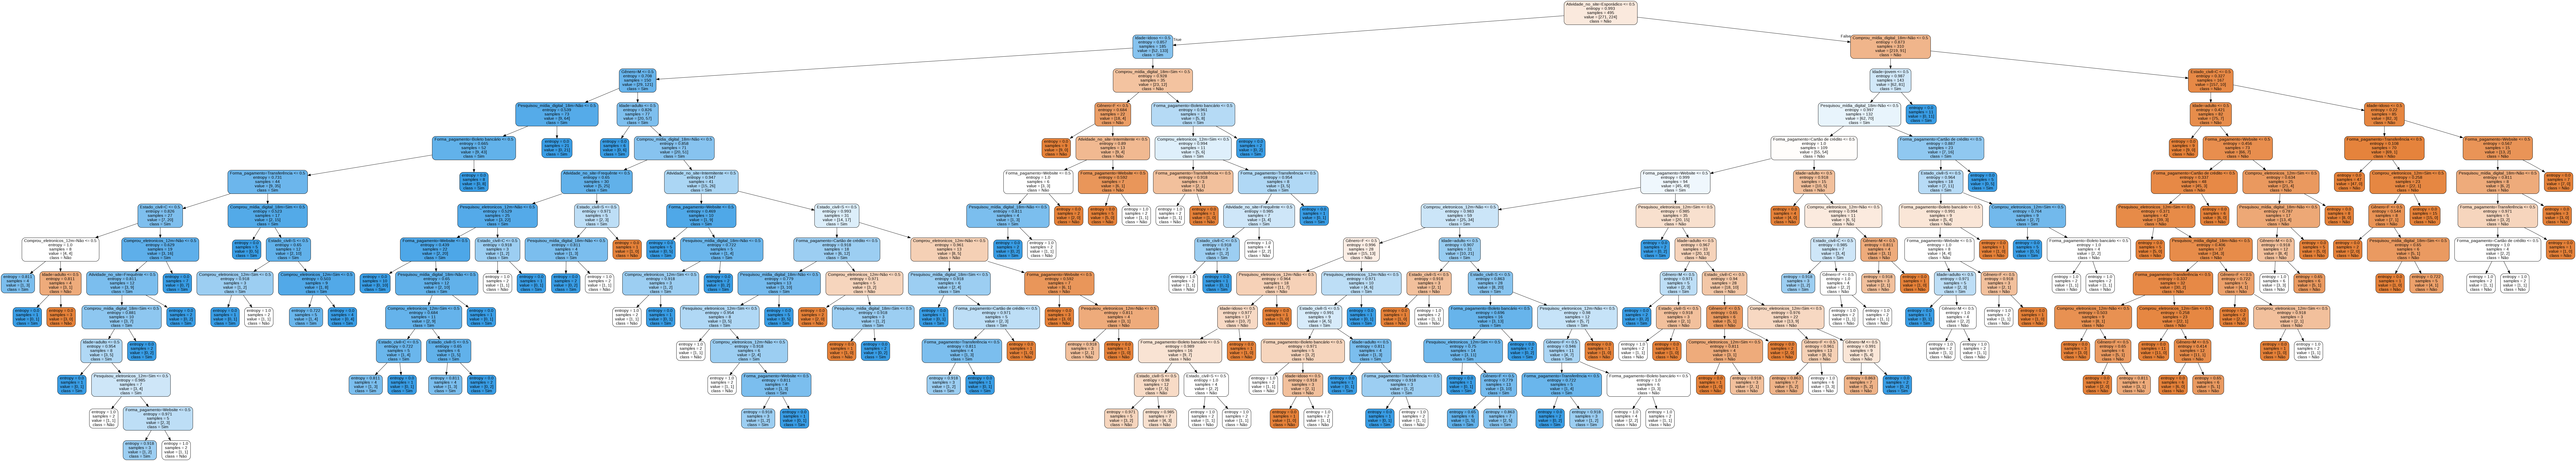

In [148]:
import pydotplus
from IPython.display import Image
# Create DOT data
dot_data = tree.export_graphviz(tree_ereader, out_file=None, 
                                feature_names=vect.feature_names_,  
                                rounded =True,
                                filled=True,
                                class_names=le.classes_)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


Podemos observar que nossa arvode de decisão está com muitos nós, precisamos aplicar a técnica de pruning (podar). Para melhorar o maximo possivel a generalização de nosso modelo.

In [149]:
path = tree_ereader.cost_complexity_pruning_path(X_train, y_train)
alphas=path["ccp_alphas"]

alphas

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.42932430e-05,
       1.22758491e-04, 1.43140859e-04, 2.86281717e-04, 3.82968434e-04,
       5.86856678e-04, 5.92986210e-04, 6.61638416e-04, 7.32900438e-04,
       8.63386841e-04, 9.05653487e-04, 9.05820234e-04, 9.17640165e-04,
       9.90353527e-04, 9.90353527e-04, 9.90353527e-04, 9.90353527e-04,
       1.25768939e-03, 1.29718436e-03, 1.30315669e-03, 1.32327683e-03,
       1.34680135e-03, 1.37221237e-03, 1.45466254e-03, 1.47517076e-03,
       1.49267691e-03, 1.52502526e-03, 1.52502526e-03, 1.52502526e-03,
       1.52502526e-03, 1.54972448e-03, 1.60125834e-03, 1.62589947e-03,
       1.66401601e-03, 1.68472492e-03, 1.72677368e-03, 1.72677368e-03,
       1.81130697e-03, 1.85794856e-03, 2.12107623e-03, 2.18245548e-03,
       2.18836426e-03, 2.26144541e-03, 2.28753789e-03, 2.51537878e-03,
       2.51537878e-03, 2.57615608e-03, 2.61949661e-03, 2.70592431e-03,
      

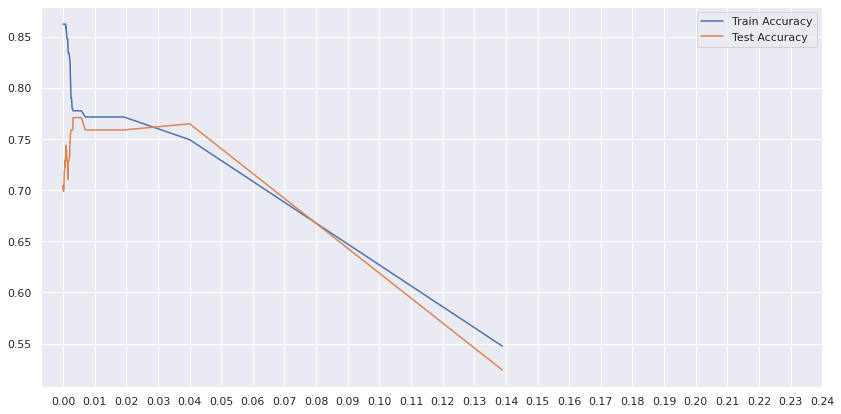

In [150]:
accuracy_train, accuracy_test =[], []

for i in alphas:
  treeTraning = DecisionTreeClassifier(ccp_alpha=i)

  treeTraning.fit(X_train, y_train)
  y_train_pred = treeTraning.predict(X_train)
  y_test_pred = treeTraning.predict(X_test)

  accuracy_train.append(accuracy_score(y_train, y_train_pred))
  accuracy_test.append(accuracy_score(y_test, y_test_pred))
  
sns.set()
plt.figure(figsize = (14,7))
sns.lineplot(y=accuracy_train, x=alphas, label = "Train Accuracy")
sns.lineplot(y=accuracy_test, x=alphas, label = "Test Accuracy")
plt.xticks(ticks=np.arange(0.00, 0.25,0.01))
plt.show()

Na imagem acima, podemos ver que temos uma interceção no ponto [0.027, 0.76], podemos limitar nossa arvore a esta altura para entender se nosso modelo melhora a generalização.

In [151]:
# treinamos novamente o modelo, agora com o parametro de poda abilitado
treeTraning = DecisionTreeClassifier(ccp_alpha=0.027, random_state=20, criterion='entropy')
treeTraning.fit(X_train, y_train)
print("Acurácia:", treeTraning.score(X_train, y_train))

y_pred = treeTraning.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, 
                         index=["Adota=Sim", "Adota=Não"], 
                         columns=["Adota(prev)=Sim", "Adota(prev)=Não"])

Acurácia: 0.7717171717171717
Acurácia de previsão: 0.7590361445783133
              precision    recall  f1-score   support

         Não       0.89      0.62      0.73        87
         Sim       0.69      0.91      0.78        79

    accuracy                           0.76       166
   macro avg       0.79      0.77      0.76       166
weighted avg       0.79      0.76      0.75       166



In [152]:
cnf_table

,Adota(prev)=Sim,Adota(prev)=Não
Adota=Sim,54,33
Adota=Não,7,72


Podemos ver pelos reports que temos uma melhora na generalização, porem uma perda no treino, este desvio para nos, é aceitavel, porque nossa capacidade de generalizar está mais precisa! E evitamos o overfitting.

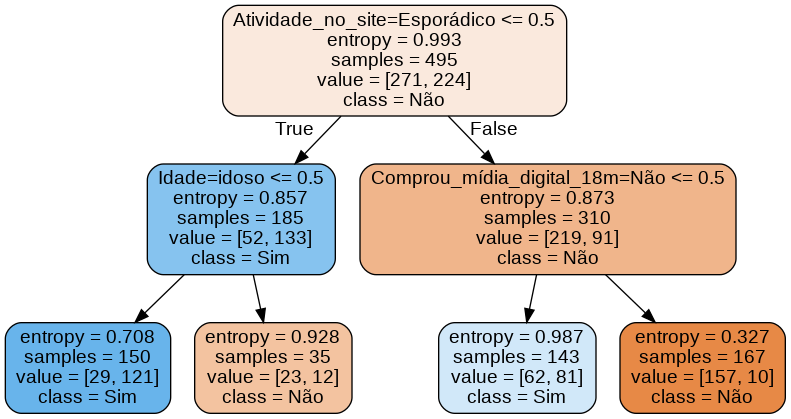

In [153]:
dot_data = tree.export_graphviz(treeTraning, out_file=None, 
                                feature_names=vect.feature_names_,  
                                rounded =True,
                                filled=True,
                                class_names=le.classes_)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Finalizando

Para completar nossa jornada, vamos jogar nosso dataframe de validação contra nosso modelo de predicao para entender o que fez sentido e o que não fez em sua predição.

In [156]:
# Primeiramente vamos pegar nosso dataframe e vetorizalo para passar em nosso modelo de predicao

# validator vetorizando

X_dict_validator = validator_df.iloc[:,0: (validator_df.shape[1])].T.to_dict().values()
X_validator = vect.fit_transform(X_dict_validator)

# prevendo validatos_df
y_validator_pred = treeTraning.predict(X_validator)


In [157]:
# agora vamos converter novamente nossa coluna de valores preditos para um vetor
# depois vamos joga-lo no dataframe de validacao e ver como ficou

dict_pred_validator = le.inverse_transform(y_validator_pred)
validator_df['Adoção_eReader'] = dict_pred_validator

In [160]:
validator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gênero                       473 non-null    object
 1   Idade                        473 non-null    object
 2   Estado_civil                 473 non-null    object
 3   Atividade_no_site            473 non-null    object
 4   Pesquisou_eletronicos_12m    473 non-null    object
 5   Comprou_eletronicos_12m      473 non-null    object
 6   Pesquisou_mídia_digital_18m  473 non-null    object
 7   Comprou_mídia_digital_18m    473 non-null    object
 8   Forma_pagamento              473 non-null    object
 9   Adoção_eReader               473 non-null    object
dtypes: object(10)
memory usage: 37.1+ KB


In [171]:
validator_df.describe()

,Gênero,Idade,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento,Adoção_eReader
count,473,473,473,473,473,473,473,473,473,473
unique,2,3,2,3,2,2,2,2,4,2
top,M,adulto,C,Esporádico,Sim,Não,Sim,Não,Website,Sim
freq,252,373,243,286,451,245,378,271,193,278


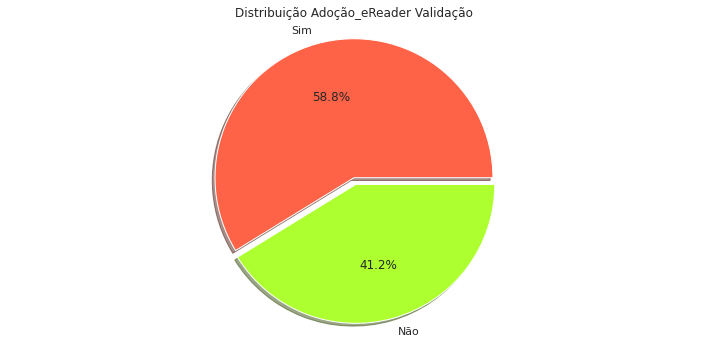

In [170]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 5)

ax.set_title('Distribuição Adoção_eReader Validação')
ax.pie(validator_df['Adoção_eReader'].value_counts(),explode=[0, 0.05], autopct='%1.1f%%', shadow=True, colors=['tomato', 'greenyellow'], 
        labels=['Sim', 'Não'])

ax.axis('equal')

plt.tight_layout()
plt.show()